In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, LabelEncoder

# EDA

## Считывание данных

In [2]:
train_df = pd.read_csv('data/train.csv').drop(columns=['Unnamed: 0'])
X_test = pd.read_csv('data/test.csv').drop(columns=['Unnamed: 0'])
train_df

,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,GBM,TCGA-06-A6S0,Male,79 years 183 days,Glioblastoma,black or african american,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-HT-8106,Male,53 years 197 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
2,LGG,TCGA-HT-7607,Female,61 years 305 days,"Astrocytoma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-QH-A6X5,Female,58 years 55 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
4,LGG,TCGA-P5-A5F1,Male,30 years 113 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,GBM,TCGA-06-0744,Male,67 years,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
599,LGG,TCGA-DU-A6S7,Female,27 years 309 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
600,LGG,TCGA-DU-5853,Male,29 years 32 days,Mixed glioma,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
601,LGG,TCGA-DU-A76R,Male,51 years 312 days,"Oligodendroglioma, anaplastic",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [3]:
X_test

,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,TCGA-DU-A5TW,Female,33 years 54 days,"Astrocytoma, anaplastic",black or african american,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,TCGA-DU-7007,Male,33 years 192 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,TCGA-P5-A5EZ,Male,39 years 131 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,TCGA-02-0055,Female,62 years 153 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,TCGA-28-5218,Male,63 years 86 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
255,TCGA-E1-A7YY,Female,27 years 6 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
256,TCGA-HW-8320,Male,36 years 354 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
257,TCGA-14-0740,Male,70 years 60 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED


## Кодирование целевой переменной

In [4]:
y_train = train_df['Grade'].apply(lambda x: 1 if x=='GBM' else 0)
X_train = train_df.drop(columns=['Grade'])

## Удаление ненужных колонок

In [5]:
X_train = X_train.drop(columns=['Case_ID'])

X_test = X_test.drop(columns=['Case_ID'])

## Конвертирование возраста (годы, дни) в число типа float

In [6]:
def age_to_float(age: str):
    nums = re.findall(r'\d+', age)
    if len(nums) == 2:
        nums[1] = float(nums[1])/365
        return float(nums[0]) + nums[1]
    elif len(nums) == 1:
        return float(nums[0])
    return None

In [7]:
X_train['Age_at_diagnosis'] = X_train['Age_at_diagnosis'].apply(age_to_float)
X_train['Age_at_diagnosis'] = X_train['Age_at_diagnosis'].fillna(X_train['Age_at_diagnosis'].mean())

X_test['Age_at_diagnosis'] = X_test['Age_at_diagnosis'].apply(age_to_float)
X_test['Age_at_diagnosis'] = X_test['Age_at_diagnosis'].fillna(X_test['Age_at_diagnosis'].mean())

## One-hot кодирование даигнозов

In [9]:
# X_train['Primary_Diagnosis'] = X_train['Primary_Diagnosis'].apply(lambda x: [diag.strip() for diag in x.split(',')])
# mlb = MultiLabelBinarizer()
# diagnosis_encoded = pd.DataFrame(mlb.fit_transform(X_train['Primary_Diagnosis']), columns=mlb.classes_)
# diagnosis_encoded = diagnosis_encoded.drop(columns=['--'])
# X_train = X_train.drop(columns=['Primary_Diagnosis'])

# X_test['Primary_Diagnosis'] = X_test['Primary_Diagnosis'].apply(lambda x: [diag.strip() for diag in x.split(',')])
# diagnosis_encoded_test = pd.DataFrame(mlb.transform(X_test['Primary_Diagnosis']), columns=mlb.classes_)
# diagnosis_encoded_test = diagnosis_encoded_test.drop(columns=['--'])
# X_test = X_test.drop(columns=['Primary_Diagnosis'])

X_train = X_train.drop(columns=['Primary_Diagnosis'])
X_test = X_test.drop(columns=['Primary_Diagnosis'])

## One-hot кодирование расы

In [10]:
races_encoded = pd.get_dummies(X_train['Race']).drop(columns=['not reported', '--', 'american indian or alaska native'])
X_train = X_train.drop(columns=['Race'])

races_encoded_test = pd.get_dummies(X_test['Race']).drop(columns=['not reported', '--'])
X_test = X_test.drop(columns=['Race'])

## One-hot кодирование пола

In [11]:
gender_encoded = pd.get_dummies(X_train['Gender']).drop(columns=['--'])
X_train = X_train.drop(columns=['Gender'])

gender_encoded_test = pd.get_dummies(X_test['Gender']).drop(columns=['--'])
X_test = X_test.drop(columns=['Gender'])

## One-hot кодирование всех колонок с информацией о мутации генов

In [12]:
genes_df = X_train.drop(columns=['Age_at_diagnosis'])
le = LabelEncoder()
le.fit(genes_df['IDH1'])
for col in genes_df.columns:
    genes_df[col] = le.transform(genes_df[col])
    

genes_df_test = X_test.drop(columns=['Age_at_diagnosis'])
for col in genes_df_test.columns:
    genes_df_test[col] = le.transform(genes_df_test[col])

In [14]:
X_train = pd.concat([X_train[['Age_at_diagnosis']], races_encoded,
                     gender_encoded, genes_df], axis=1)

X_test = pd.concat([X_test[['Age_at_diagnosis']], races_encoded_test,
                     gender_encoded_test, genes_df_test], axis=1)

## Применяю StandardScaler к колонке с возрастом

In [15]:
scaler = StandardScaler()
scaler.fit(X_train[['Age_at_diagnosis']])
X_train[['Age_at_diagnosis']] = scaler.transform(X_train[['Age_at_diagnosis']])
X_test[['Age_at_diagnosis']] = scaler.transform(X_test[['Age_at_diagnosis']])

## Итоговая таблица

In [16]:
X_train

,Age_at_diagnosis,asian,black or african american,white,Female,Male,IDH1,TP53,ATRX,PTEN,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1.797502,False,True,False,False,True,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0.137858,False,False,True,False,True,0,0,1,1,...,1,1,1,1,1,1,1,1,0,1
2,0.668187,False,False,True,True,False,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0.432622,False,False,True,True,False,0,1,1,1,...,1,1,1,0,1,1,1,1,1,1
4,-1.347170,False,False,True,False,True,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,0.998330,False,False,True,False,True,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
599,-1.504622,False,False,True,True,False,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
600,-1.425283,False,False,True,False,True,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
601,0.030146,False,False,True,False,True,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<Axes: xlabel='Age_at_diagnosis'>

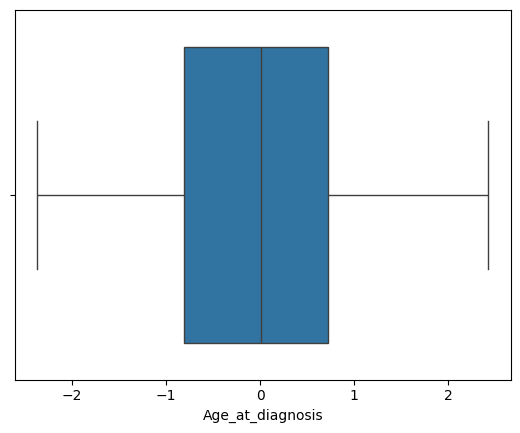

In [17]:
sns.boxplot(X_train, x='Age_at_diagnosis')

В целом матрица корреляций довольно разреженная, однако можно увидеть взаимосвязи между мутациями конкретных генов, а так же зависимость между возрастом и некоторыми диагнозами (например Glioblastoma) а также мутациями некоторых генов.
Также видно, что диагноз Glioblastoma имеет корреляцию с целевой переменной Grade почти равную 1, поэтому удалим этот признак.

<Axes: >

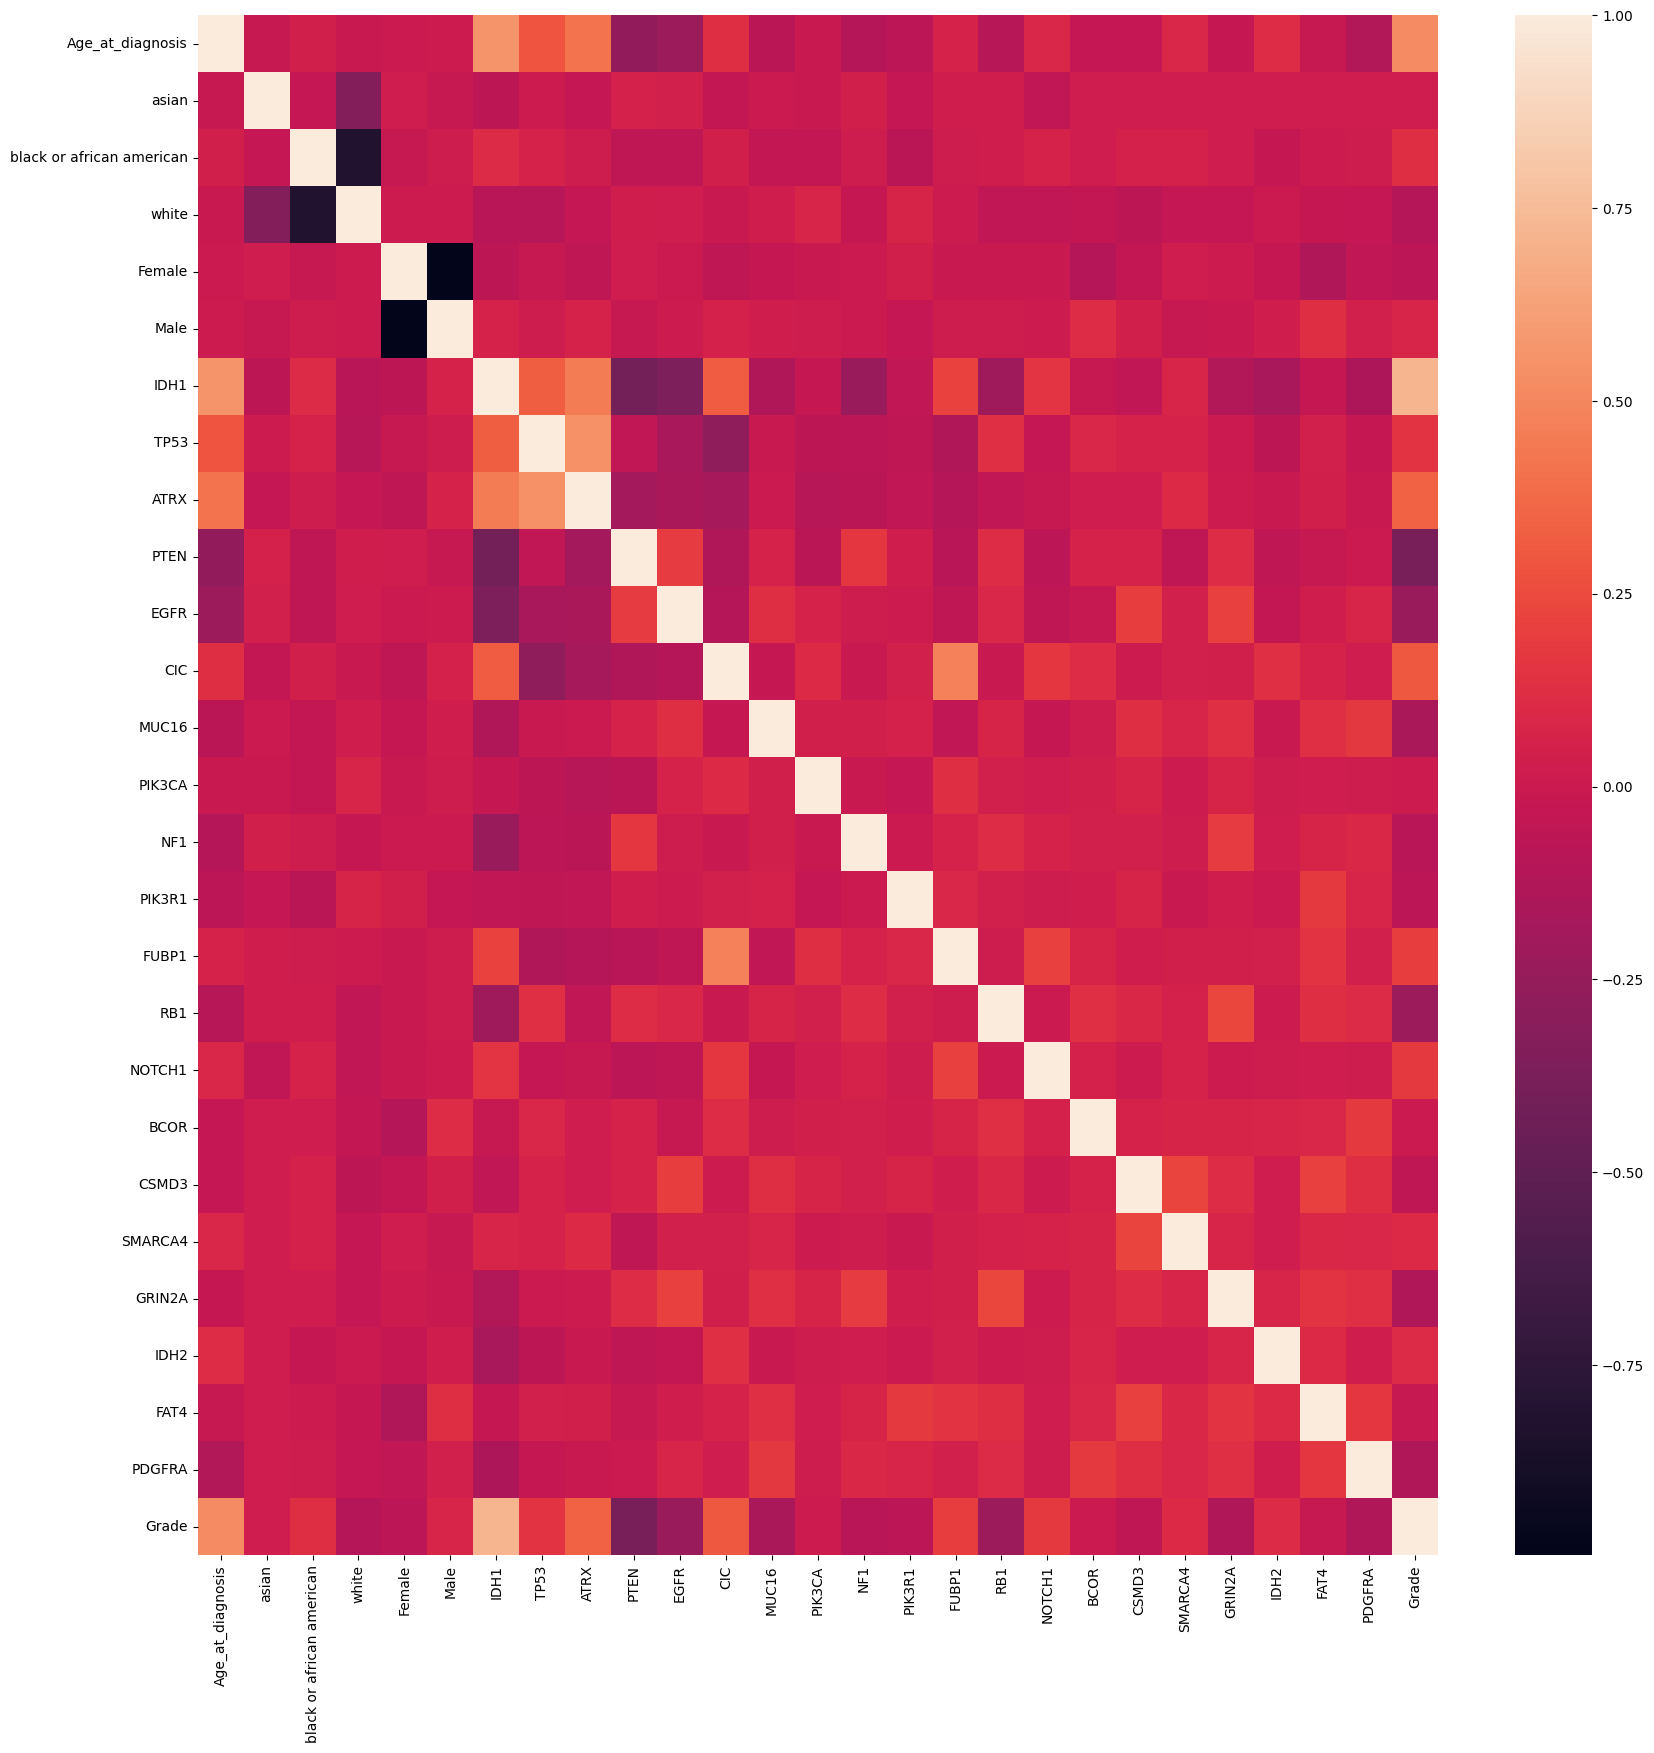

In [18]:
train_df = pd.concat([X_train, pd.Series(y_train, name='Grade')], axis=1)
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr())

In [18]:
X_train = X_train.drop(columns=['Glioblastoma'])
X_test = X_test.drop(columns=['Glioblastoma'])

# Простые модели

- рассмотреть работу простых моделей на тренировочных данных 
- посмотреть на какие признаки больше всего "смотрят" модели
- как ведёт модель себя на валидации(провести кросс-валидацию, построить валидационные кривые)
- Найти оптимальные гиперпараметры

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score
from pprint import pprint
import polars as pl

## Логистическая регрессия

Для начала рассмотрим логистическую регрессию. Обучим её на дефолтных значениях и посмотрим на веса модели, чтобы оценить отношение к признакам

In [56]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg

LogisticRegression()

Можно увидеть, что модель больше всего обращает внимание на признак IDH1, а дальше на IDH2 и NOTCH1 

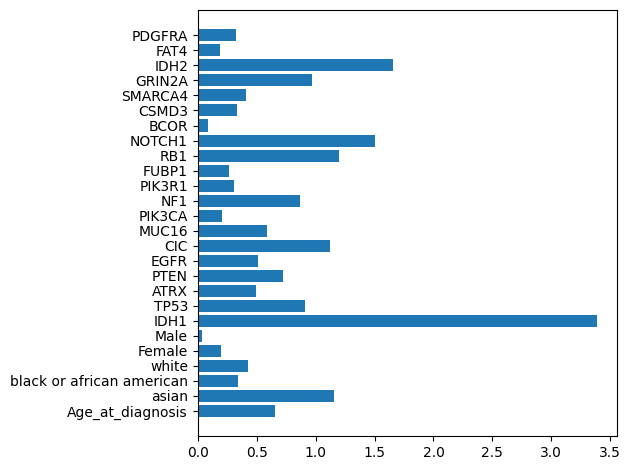

In [57]:
plt.barh(np.arange(log_reg.coef_[0].shape[0]), np.abs(log_reg.coef_[0]))
plt.yticks(np.arange(log_reg.coef_[0].shape[0]), X_train.columns)
plt.tight_layout()
plt.show()

In [76]:
cross_val_res = cross_val_score(log_reg, X_train, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.8631 +/- 0.0220


Теперь рассмотрим, как ведёт себя лог. регресссия относительно силы регуляризации с помощью разных cпособов регуляризации(соответсвенно разные solver)

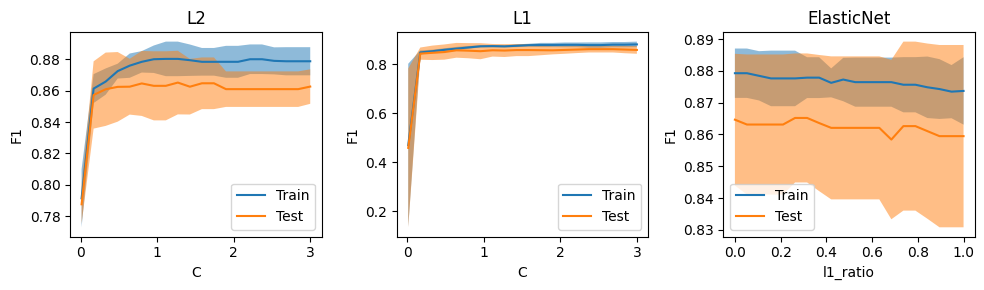

In [107]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ValidationCurveDisplay.from_estimator(LogisticRegression(penalty="l2"),
                                                X_train, y_train, param_name="C", param_range=np.linspace(0.01, 3, 20), cv=3,
                                                scoring="f1", ax=ax[0]
                                                )
    ValidationCurveDisplay.from_estimator(LogisticRegression(penalty="l1", solver="liblinear"),
                                                X_train, y_train, param_name="C", param_range=np.linspace(0.01, 3, 20), cv=3,
                                                scoring="f1", ax=ax[1]
                                                )
    ValidationCurveDisplay.from_estimator(LogisticRegression(penalty="elasticnet", solver="saga"),
                                                X_train, y_train, param_name="l1_ratio", param_range=np.linspace(0.0, 1.0, 20), cv=3,
                                                scoring="f1", ax=ax[2]
                                                )
ax[0].set_title("L2")
ax[1].set_title("L1")
ax[2].set_title("ElasticNet")
plt.tight_layout()
plt.show()

Теперь найдём оптимальные параметры. 

In [94]:
param_grid = [
    {"penalty": ["l2"], "solver": ["lbfgs", "liblinear", "newton-cg", "sag", "saga"], "C": np.linspace(0.001, 3, 80)},
    {"penalty": ["l1"], "solver": ["liblinear", "saga"], "C": np.linspace(0.001, 3, 80)},
    {"penalty": ["elasticnet"], "solver": ["saga"], "l1_ratio": np.linspace(0.0, 1.0, 100)}
]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_log_reg = GridSearchCV(LogisticRegression(), param_grid=param_grid, scoring="f1", n_jobs=3, verbose=1, cv=3)
    grid_log_reg.fit(X_train, y_train)

Fitting 3 folds for each of 660 candidates, totalling 1980 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

In [102]:
grid_log_reg.best_params_

{'C': 1.2917088607594935, 'penalty': 'l2', 'solver': 'newton-cg'}

In [101]:
cross_val_res = cross_val_score(LogisticRegression(**grid_log_reg.best_params_), X_train, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.8668 +/- 0.0194


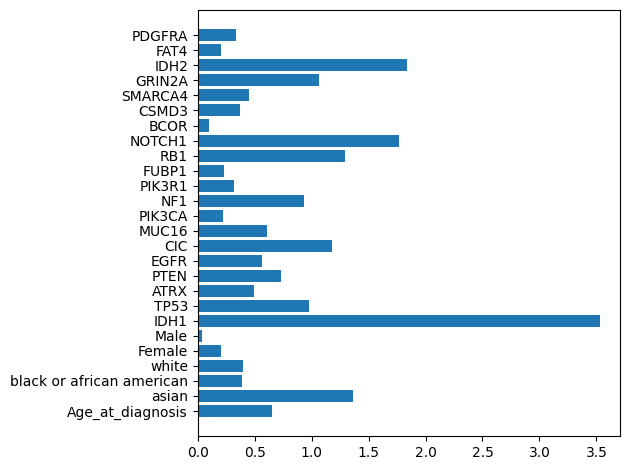

In [171]:
log_reg = LogisticRegression(**grid_log_reg.best_params_)
log_reg.fit(X_train, y_train)
plt.barh(np.arange(log_reg.coef_[0].shape[0]), np.abs(log_reg.coef_[0]))
plt.yticks(np.arange(log_reg.coef_[0].shape[0]), X_train.columns)
plt.tight_layout()
plt.show()

## Дерево принятия решений

Теперь обучим дерево принятия решений

In [113]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_tree

DecisionTreeClassifier()

Визуализируем его и попробуем оценить признаки на которые смотрит модель

In [114]:
from supertree import SuperTree
super_tree = SuperTree(dec_tree, X_train.to_numpy(), y_train.to_numpy(), list(X_train.columns), ["LGG", "GBM"])
super_tree.show_tree()

In [122]:
cross_val_res = cross_val_score(dec_tree, X_train, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.7376 +/- 0.0505


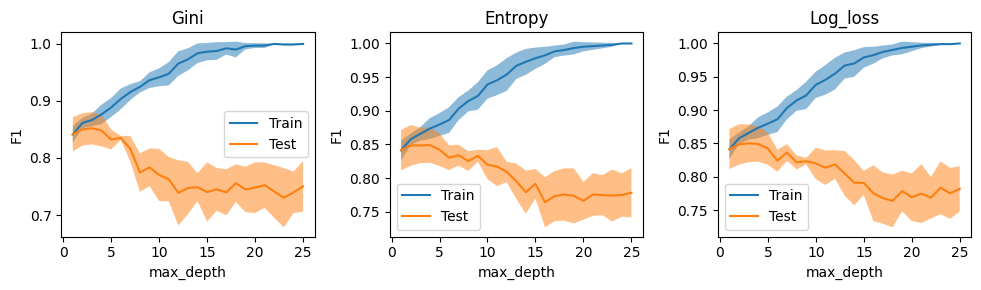

In [116]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(criterion="gini"),
                                                X_train, y_train, param_name="max_depth", param_range=range(1, len(X_train.columns)), cv=3,
                                                scoring="f1", ax=ax[0]
                                                )
    ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(criterion="entropy"),
                                                X_train, y_train, param_name="max_depth", param_range=range(1, len(X_train.columns)), cv=3,
                                                scoring="f1", ax=ax[1]
                                                )
    ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(criterion="log_loss"),
                                                X_train, y_train, param_name="max_depth", param_range=range(1, len(X_train.columns)), cv=3,
                                                scoring="f1", ax=ax[2]
                                                )
ax[0].set_title("Gini")
ax[1].set_title("Entropy")
ax[2].set_title("Log_loss")
plt.tight_layout()
plt.show()

In [117]:
param_grid = [
    {"criterion": ["gini", "entropy", "log_loss"], "max_depth": range(1, len(X_train.columns))},
]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_dec_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring="f1", n_jobs=3, verbose=1, cv=3)
    grid_dec_tree.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


In [118]:
grid_dec_tree.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [121]:
cross_val_res = cross_val_score(DecisionTreeClassifier(**grid_dec_tree.best_params_), X_train, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.8521 +/- 0.0283


In [170]:
from supertree import SuperTree
dec_tree = DecisionTreeClassifier(**grid_dec_tree.best_params_)
dec_tree.fit(X_train, y_train)
super_tree = SuperTree(dec_tree, X_train.to_numpy(), y_train.to_numpy(), list(X_train.columns), ["LGG", "GBM"])
super_tree.show_tree()

## KNN

Следующий алгоритм, который мы рассмотрим, будет KNN

In [127]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

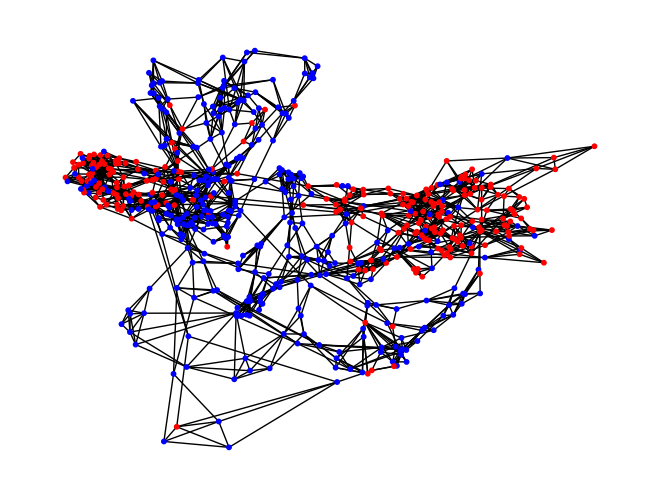

In [158]:
import networkx as nx 
kneighbors_graph = nx.from_scipy_sparse_array(knn.kneighbors_graph(X_train, mode="distance"))
kneighbors_graph.remove_edges_from(nx.selfloop_edges(kneighbors_graph))
color_map = ["blue" if i == 0 else "red" for i in y_train]
nx.draw(kneighbors_graph, node_size=10, node_color=color_map)
plt.draw()

In [148]:
cross_val_res = cross_val_score(knn, X_train, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.8214 +/- 0.0201


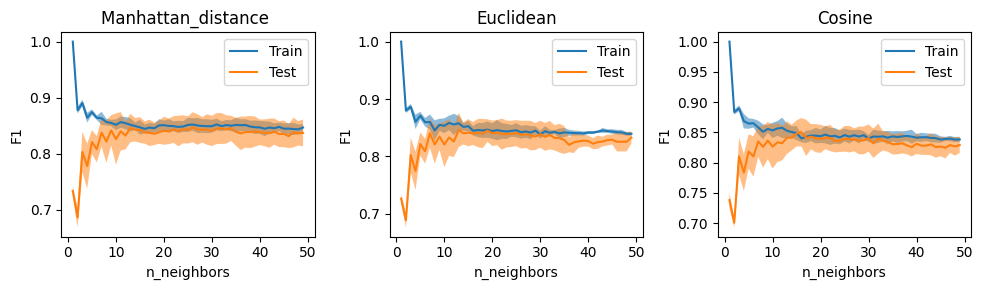

In [160]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ValidationCurveDisplay.from_estimator(KNeighborsClassifier(p=1),
                                                X_train, y_train, param_name="n_neighbors", param_range=range(1, 50), cv=3,
                                                scoring="f1", ax=ax[0]
                                                )
    ValidationCurveDisplay.from_estimator(KNeighborsClassifier(p=2),
                                                X_train, y_train, param_name="n_neighbors", param_range=range(1, 50), cv=3,
                                                scoring="f1", ax=ax[1]
                                                )
    ValidationCurveDisplay.from_estimator(KNeighborsClassifier(metric="cosine"),
                                                X_train, y_train, param_name="n_neighbors", param_range=range(1, 50), cv=3,
                                                scoring="f1", ax=ax[2]
                                                )
ax[0].set_title("Manhattan_distance ")
ax[1].set_title("Euclidean")
ax[2].set_title("Cosine")
plt.tight_layout()
plt.show()

In [162]:
param_grid = [
    {"p": ["1"], "n_neighbors": range(1, 50)},
    {"p": ["2"], "n_neighbors": range(1, 50)},
    {"metric": ["cosine"], "n_neighbors": range(1, 50)}
]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring="f1", n_jobs=3, verbose=1, cv=3)
    grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 147 candidates, totalling 441 fits


In [163]:
grid_knn.best_params_

{'metric': 'cosine', 'n_neighbors': 16}

In [164]:
cross_val_res = cross_val_score(KNeighborsClassifier(**grid_knn.best_params_), X_train, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.8502 +/- 0.0235


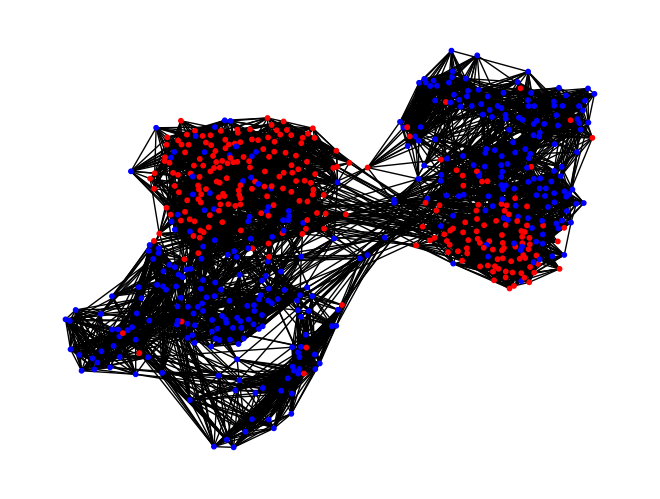

In [169]:
import networkx as nx 
knn = KNeighborsClassifier(**grid_knn.best_params_)
knn.fit(X_train, y_train)
kneighbors_graph = nx.from_scipy_sparse_array(knn.kneighbors_graph(X_train, mode="distance"))
kneighbors_graph.remove_edges_from(nx.selfloop_edges(kneighbors_graph))
color_map = ["blue" if i == 0 else "red" for i in y_train]
nx.draw(kneighbors_graph, node_size=10, node_color=color_map)
plt.draw()